# 4. Tuning the parameters of KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/up/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/up/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/up/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/up/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

In [3]:
X_train.shape

(7750, 18)

In [4]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichi

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [5]:
knn1= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 3, weights= 'distance')

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="accuracy")

results.append(cv_results)
    
msg = f" KNN: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 KNN: 0.9554838709677419 (0.04591536348040796)


By the parameter {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}, it reached the mean:0.95.

In [6]:
names = ["knn"]
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,knn
0,0.912258
1,0.908387
2,0.917419
3,0.883871
4,0.932903
5,1.000000
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [7]:
#save the score
score.to_csv('../data/score/up/after_tuning_parameter/KNN/knn_cross_val_accuracy.csv', index=False)

In [8]:
#save the model
knn1.fit(X_train, y_train)

filename = "../models/ups_ver_knn.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(knn1,file)

#### recall

In [9]:

results2 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results2 = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="recall")

results2.append(cv_results2)
    
msg2 = f" KNN: {cv_results2.mean()} ({cv_results2.std()})"
print(msg2)

 KNN: 0.5 (0.5)


In [10]:
names2 = ["recall"]
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,recall
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


[CV 2/5; 1/24] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 2/5; 1/24] END algorithm=auto, n_neighbors=3, weights=uniform;, score=(train=0.975, test=0.953) total time=   0.2s
[CV 1/5; 3/24] START algorithm=auto, n_neighbors=5, weights=uniform.............
[CV 1/5; 3/24] END algorithm=auto, n_neighbors=5, weights=uniform;, score=(train=0.954, test=0.934) total time=   0.1s
[CV 5/5; 4/24] START algorithm=auto, n_neighbors=5, weights=distance............
[CV 5/5; 4/24] END algorithm=auto, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.950) total time=   0.1s
[CV 3/5; 6/24] START algorithm=auto, n_neighbors=7, weights=distance............
[CV 3/5; 6/24] END algorithm=auto, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.932) total time=   0.1s
[CV 1/5; 8/24] START algorithm=ball_tree, n_neighbors=3, weights=distance.......
[CV 1/5; 8/24] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.956) total time=

In [12]:
score2.to_csv('../data/score/up/after_tuning_parameter/KNN/knn_cross_val_recall.csv', index=False)

### Cross validation socre -Precision-

In [13]:
results3 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results3 = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="recall")

results3.append(cv_results3)
    
msg3 = f" KNN: {cv_results3.mean()} ({cv_results3.std()})"
print(msg3)

names3 = ["precision"]
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

score3.to_csv('../data/score/up/after_tuning_parameter/KNN/knn_cross_val_precision.csv', index=False)

 KNN: 0.5 (0.5)


,precision
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


### Cross validation socre -f1-

In [14]:
results4 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results4 = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="f1")

results4.append(cv_results4)
    
msg4 = f" KNN: {cv_results4.mean()} ({cv_results4.std()})"
print(msg4)

names4 = ["f1"]
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

score4.to_csv('../data/score/up/after_tuning_parameter/KNN/knn_cross_val_f1.csv', index=False)

 KNN: 0.5 (0.5)


,f1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


### Variable Importance 

To quantify how much the feature contributes to the model's ability to capture patterns and make accurate predictions, look at the variable importance.

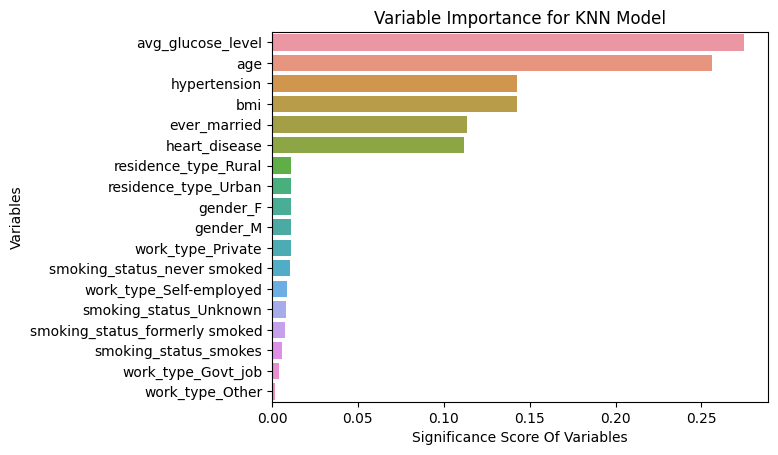

In [24]:
X_train2 = pd.read_csv('../data/x_y_data/up/X_resampled.csv')
y_train2 = pd.read_csv('../data/x_y_data/up/y_resampled.csv')


knn_tuned = knn1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(knn1, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for KNN Model")
plt.show()


In [25]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df

,0
avg_glucose_level,0.275032
age,0.255884
hypertension,0.142697
bmi,0.142632
ever_married,0.113535
heart_disease,0.111897
residence_type_Rural,0.011148
residence_type_Urban,0.011148
gender_F,0.010877
gender_M,0.010877


In [26]:
# change the columns' name 
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df

,Significance Score
avg_glucose_level,0.275032
age,0.255884
hypertension,0.142697
bmi,0.142632
ever_married,0.113535
heart_disease,0.111897
residence_type_Rural,0.011148
residence_type_Urban,0.011148
gender_F,0.010877
gender_M,0.010877


In [27]:
#save
feature_importances_df.to_csv('../data/score/up/Significant_Score/KNN_Significance_Score.csv', index=False)

### the classification report

In [28]:
from sklearn.metrics import confusion_matrix


y_pred = knn1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[896,  76],
       [ 37,  11]])

In [29]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    933
1     87
Name: count, dtype: int64

In [30]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

0    972
1     48
Name: count, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = knn1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.889216
1,Precision,0.126437
2,Recall,0.229167
3,F1-Score,0.162963
4,Kappa,0.108915


In [32]:
metrics_df.to_csv('../data/metrics/up/up_knn_metrics.csv', index=False)